## Importing necessary libraries

In [1]:
import cifar10


In [63]:
from sklearn import model_selection,linear_model,svm,neighbors,decomposition,metrics,ensemble
import matplotlib.pyplot as plt
import numpy as np
import time
import matplotlib.image as mpimg

In [3]:
cifar10.data_path = "data/CIFAR-10/" #path 

In [4]:
cifar10.maybe_download_and_extract() ## downloading the data

Data has apparently already been downloaded and unpacked.


In [5]:
cifar10

<module 'cifar10' from 'C:\\Users\\Bhavik\\Desktop\\ML - Coding Ninjas\\Projects\\Project 5 - CIFAR\\cifar10.py'>

### Analysing the data

In [6]:
class_names = cifar10.load_class_names()
class_names

Loading data: data/CIFAR-10/cifar-10-batches-py/batches.meta


['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [7]:
images_train, cls_train, labels_train = cifar10.load_training_data()
images_test, cls_test, labels_test = cifar10.load_test_data()

Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_1
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_2
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_3
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_4
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_5
Loading data: data/CIFAR-10/cifar-10-batches-py/test_batch


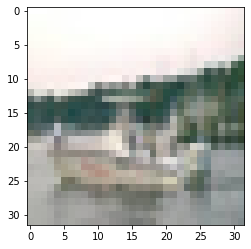

In [8]:
plt.imshow(images_train[240])
plt.show()

In [9]:
print(images_train.shape)
print(cls_train.shape)
print(labels_train.shape)
print(images_test.shape)
print(cls_test.shape)
print(labels_test.shape)

(50000, 32, 32, 3)
(50000,)
(50000, 10)
(10000, 32, 32, 3)
(10000,)
(10000, 10)


### SEEING THE IMAGES

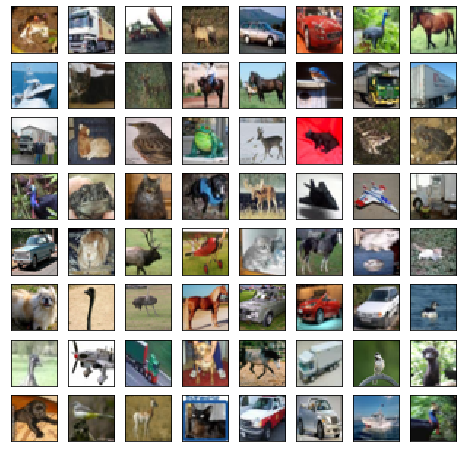

In [10]:
fig=plt.figure(figsize=(8,8))
for i in range(64):
    ax=fig.add_subplot(8,8,i+1, xticks = [], yticks= [])# rows and columns and image number starting from 1
    ax.imshow(images_train[i],cmap=plt.cm.bone)
plt.show()

### Removing RGb and converting the image to one color only

In [11]:
print(images_train[2].shape)
print(type(images_train[2]))

(32, 32, 3)
<class 'numpy.ndarray'>


In [12]:
images_train.shape

(50000, 32, 32, 3)

In [13]:
images_test.shape

(10000, 32, 32, 3)

In [14]:
images_train[2].shape

(32, 32, 3)

In [15]:
images_test[2].shape

(32, 32, 3)

In [16]:
32*32

1024

In [17]:
x_train = np.empty((50000,1024,3))
x_test =  np.empty((10000,1024,3))

In [18]:
for i in range(len(images_train)):
  x_train[i] = images_train[i].reshape(1024,3)
  
  

In [19]:
for i in range(len(images_test)):
  x_test[i] = images_test[i].reshape(1024,3)

In [20]:
x_train.shape

(50000, 1024, 3)

In [21]:
x_test.shape

(10000, 1024, 3)

In [22]:
x_train_transformed = np.empty((50000,1024,1))
x_test_transformed = np.empty((10000,1024,1))


In [23]:
pca = decomposition.PCA(n_components = 1)

for i in range(len(x_train)):
    x_train_transformed[i] = pca.fit_transform(x_train[i])
    

In [24]:
for i in range(len(x_test)):
    x_test_transformed[i] = pca.transform(x_test[i])

In [25]:
 x_train_transformed.shape

(50000, 1024, 1)

In [26]:
x_test_transformed.shape

(10000, 1024, 1)

In [27]:
x_train_transformed =  x_train_transformed.reshape(50000,32,32)
x_test_transformed =  x_test_transformed.reshape(10000,32,32)


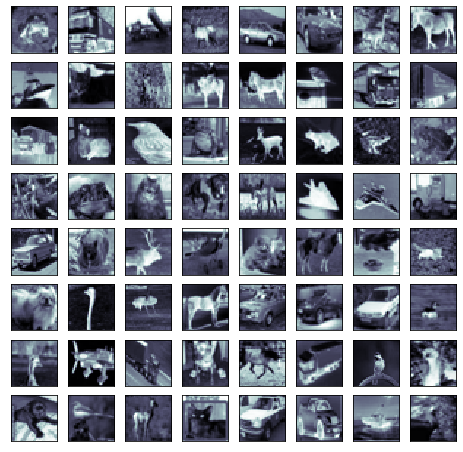

In [28]:
fig=plt.figure(figsize=(8,8))
for i in range(64):
    ax=fig.add_subplot(8,8,i+1, xticks = [], yticks= [])# rows and columns and image number starting from 1
    ax.imshow(x_train_transformed[i], cmap = plt.cm.bone)
plt.show()

#### The images are now converted into  single color

In [29]:
x_train_transformed.shape

(50000, 32, 32)

In [30]:
x_train_transformed_data = x_train_transformed.reshape(50000, 1024)

In [31]:
x_test_transformed.shape

(10000, 32, 32)

In [32]:
x_test_transformed_data = x_test_transformed.reshape(10000, 1024)

In [33]:
pca1 = decomposition.PCA()
pca1.fit_transform(x_train_transformed_data)


array([[-2.22904567e+00, -1.81390816e+00,  5.07320161e-02, ...,
        -4.21110925e-03,  9.95239452e-03, -4.44761367e-15],
       [-2.94411225e-01,  6.40110949e+00,  1.97308238e+00, ...,
        -9.99240663e-03, -1.91756272e-03, -3.42228735e-14],
       [ 1.64321750e+01,  1.51585386e+00, -2.86018828e+00, ...,
        -1.90976993e-03, -1.95131712e-03,  2.98042097e-14],
       ...,
       [ 1.31368541e+01, -9.92557616e-01, -7.63960705e-01, ...,
         1.35263298e-02, -2.13127213e-03,  2.57327703e-14],
       [-6.36416365e+00,  4.78511069e+00,  1.10431159e+00, ...,
         5.83946151e-03, -2.55034524e-03,  1.17260757e-15],
       [-3.91325483e+00, -3.83324870e+00, -6.73973946e-02, ...,
         3.54562404e-03,  3.06070982e-03, -5.49926236e-16]])

In [34]:
pca1.components_.shape

(1024, 1024)

In [35]:
pca1.explained_variance_.shape

(1024,)

In [36]:
var_ratio = pca1.explained_variance_/pca1.explained_variance_.sum()

In [37]:
k = 0 
var = 0
while var<.80:
    var += var_ratio[k]
    k+=1


In [38]:
k

42

In [39]:
pca2=decomposition.PCA(n_components=k,whiten=True) #whiten works eqivalent to feature scaling in these k features
x_train_transformed_data_pca=pca2.fit_transform(x_train_transformed_data)

In [40]:
x_train_transformed_data_pca.shape

(50000, 42)

In [41]:
x_test_transformed_data_pca = pca2.transform(x_test_transformed_data)

In [42]:
x_test_transformed_data_pca.shape

(10000, 42)

In [43]:
x_approx = pca2.inverse_transform(x_train_transformed_data_pca)

In [44]:
x_approx = x_approx.reshape(50000,32,32)

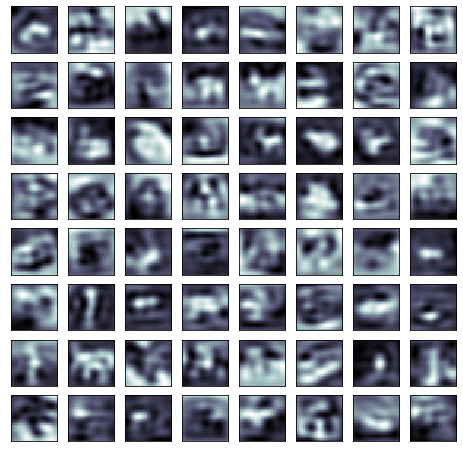

In [45]:
fig=plt.figure(figsize=(8,8))
for i in range(64):
    ax=fig.add_subplot(8,8,i+1, xticks = [], yticks= [])# rows and columns and image number starting from 1
    ax.imshow(x_approx[i], cmap = plt.cm.bone)
plt.show()

In [46]:
pca2.components_.shape

(42, 1024)

In [47]:
pca2.explained_variance_.shape

(42,)

In [48]:
eigenv = pca2.components_

In [49]:
eigenv.shape

(42, 1024)

In [50]:
eigenv = eigenv.reshape(42,32,32)

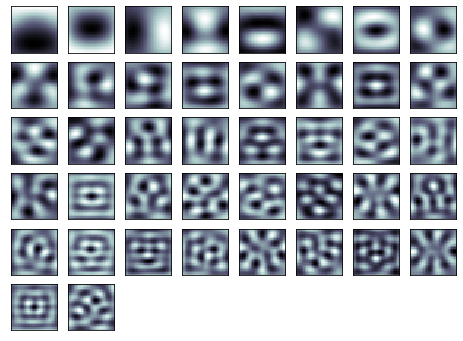

In [51]:
fig=plt.figure(figsize=(8,8))
for i in range(42):
    ax=fig.add_subplot(8,8,i+1, xticks = [], yticks= [])# rows and columns and image number starting from 1
    ax.imshow(eigenv[i], cmap = plt.cm.bone)
plt.show()

In [52]:
x_train_transformed_data_pca.shape

(50000, 42)

In [53]:
cls_train.shape

(50000,)

In [54]:
x_test_transformed_data_pca.shape

(10000, 42)

In [55]:
cls_test.shape

(10000,)

###  SVM

In [68]:
clf1 = svm.SVC()
clf1.fit(x_train_transformed_data_pca,cls_train)


C:\Users\Bhavik\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [69]:
pred1 = clf1.predict(x_test_transformed_data_pca)

In [71]:
print(metrics.classification_report(cls_test,pred1))
print(metrics.confusion_matrix(cls_test,pred1))

              precision    recall  f1-score   support

           0       0.47      0.39      0.43      1000
           1       0.46      0.39      0.42      1000
           2       0.32      0.26      0.29      1000
           3       0.27      0.26      0.26      1000
           4       0.26      0.43      0.33      1000
           5       0.34      0.35      0.35      1000
           6       0.37      0.36      0.37      1000
           7       0.47      0.44      0.46      1000
           8       0.47      0.47      0.47      1000
           9       0.47      0.44      0.45      1000

    accuracy                           0.38     10000
   macro avg       0.39      0.38      0.38     10000
weighted avg       0.39      0.38      0.38     10000

[[391  37  79  23 163  19  58  45 143  42]
 [ 43 390  18  59  60  42  42  65 120 161]
 [ 62  28 261  85 243 131  95  44  22  29]
 [ 27  53  97 258 119 180 111  59  25  71]
 [ 70  33  84  72 434  50 114  68  59  16]
 [ 13  31  91 175 108 351 

In [72]:
grid = {'C' : [1e2, 1e3, 5e3, 1e4, 5e4, 1e5],
       'gamma' : [1e-3, 5e-4, 1e-4, 5e-3]}
abc = model_selection.GridSearchCV(clf1,grid)

abc.fit(x_train_transformed_data_pca,cls_train)

C:\Users\Bhavik\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


KeyboardInterrupt: 

### Logistic Regression

In [ ]:
clf2 = linear_model.LogisticRegression()


In [ ]:
start2 = time.time()
clf2.fit(x_train_transformed_data_pca,cls_train)
end2 = time.time()
print(end2 - start2 )

In [ ]:
y_pred2 = clf2.predict(x_test_transformed_data_pca)

In [ ]:
print(metrics.classification_report(cls_test,y_pred2))
print(metrics.confusion_matrix(cls_test,y_pred2))

In [ ]:
clf2.score(x_test_transformed_data_pca,cls_test)

### KNN

In [57]:
clf3 = neighbors.KNeighborsClassifier()

In [58]:
start3 = time.time()
clf3.fit(x_train_transformed_data_pca,cls_train)
end3 = time.time()
print(end3 - start3 )

0.2384033203125


In [59]:
y_pred3 = clf3.predict(x_test_transformed_data_pca)

In [60]:
print(metrics.classification_report(cls_test,y_pred3))
print(metrics.confusion_matrix(cls_test,y_pred3))

              precision    recall  f1-score   support

           0       0.24      0.51      0.32      1000
           1       0.46      0.17      0.25      1000
           2       0.20      0.40      0.27      1000
           3       0.21      0.11      0.15      1000
           4       0.17      0.30      0.22      1000
           5       0.35      0.13      0.19      1000
           6       0.23      0.28      0.25      1000
           7       0.53      0.19      0.28      1000
           8       0.38      0.41      0.40      1000
           9       0.57      0.07      0.12      1000

    accuracy                           0.26     10000
   macro avg       0.33      0.26      0.24     10000
weighted avg       0.33      0.26      0.24     10000

[[513  14 140   8 107   8  50   9 148   3]
 [206 173  96  54 129  19 111  31 160  21]
 [227   9 404  42 153  34  83  13  35   0]
 [143  35 261 114 162  61 170  20  24  10]
 [246  10 225  31 298  17  96  13  63   1]
 [110  28 235  99 181 129 

### Random Forest

In [64]:
clf4 = ensemble.RandomForestClassifier()

In [65]:
start4 = time.time()
clf4.fit(x_train_transformed_data_pca,cls_train)
end4 = time.time()
print(end4 - start4 )

C:\Users\Bhavik\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


4.774441719055176


In [66]:
y_pred4 = clf3.predict(x_test_transformed_data_pca)

In [67]:
print(metrics.classification_report(cls_test,y_pred3))
print(metrics.confusion_matrix(cls_test,y_pred3))

              precision    recall  f1-score   support

           0       0.24      0.51      0.32      1000
           1       0.46      0.17      0.25      1000
           2       0.20      0.40      0.27      1000
           3       0.21      0.11      0.15      1000
           4       0.17      0.30      0.22      1000
           5       0.35      0.13      0.19      1000
           6       0.23      0.28      0.25      1000
           7       0.53      0.19      0.28      1000
           8       0.38      0.41      0.40      1000
           9       0.57      0.07      0.12      1000

    accuracy                           0.26     10000
   macro avg       0.33      0.26      0.24     10000
weighted avg       0.33      0.26      0.24     10000

[[513  14 140   8 107   8  50   9 148   3]
 [206 173  96  54 129  19 111  31 160  21]
 [227   9 404  42 153  34  83  13  35   0]
 [143  35 261 114 162  61 170  20  24  10]
 [246  10 225  31 298  17  96  13  63   1]
 [110  28 235  99 181 129 